# Análise de Focos de Queimadas — 2024

## Seção 1: Introdução e Objetivos do Projeto

### 1.1. Contextualização: A Importância do Monitoramento Ambiental no Brasil

O Brasil, detentor de uma das maiores biodiversidades do planeta, enfrenta desafios ambientais significativos, com as queimadas e o desmatamento figurando entre as principais ameaças aos seus biomas, especialmente a Amazônia, o Cerrado e o Pantanal. O monitoramento desses fenômenos é crucial não apenas para a conservação ambiental, mas também para a saúde pública, a economia e o cumprimento de metas climáticas internacionais. A análise de dados sobre a ocorrência de fogo na vegetação permite identificar padrões, avaliar a eficácia de políticas públicas e direcionar ações de fiscalização e combate.

Nesse contexto, a política de dados abertos adotada por instituições governamentais é um pilar para a transparência e o controle social. A disponibilização de informações de qualidade permite que pesquisadores, jornalistas e a sociedade civil organizada contribuam para o combate a crimes ambientais, promovendo soluções inovadoras e de baixo custo. Este projeto se insere nesse esforço coletivo, utilizando dados públicos para gerar conhecimento e ferramentas de visualização sobre um tema de alta relevância nacional.

### 1.2. O Conjunto de Dados: Focos de Queimadas do INPE

A fonte de dados para este projeto é o **Programa Queimadas** do Instituto Nacional de Pesquisas Espaciais (INPE), uma referência global no monitoramento de queimadas e incêndios florestais por meio de imagens de satélite. O INPE disponibiliza um vasto acervo de dados abertos, atualizados continuamente, que são essenciais para a pesquisa científica e a gestão ambiental no país.

Para este trabalho, você utilizará os dados anuais de focos de queimadas do ano de 2024, disponíveis para download no formato CSV.

**Link para download:** `https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/Brasil_todos_sats/focos_br_todos-sats_2024.zip`

### 1.3. Desafio Proposto e Objetivos

O seu objetivo é conduzir uma análise exploratória de dados (EDA) completa sobre os focos de queimadas detectados no Brasil durante o ano de 2024. Você deverá realizar todo o processo de ciência de dados, desde a obtenção e limpeza dos dados até a criação de visualizações e um dashboard interativo para apresentar seus resultados.

Ao longo do projeto, você deverá responder a perguntas-chave como:
* Qual a distribuição temporal (sazonalidade) dos focos de queimadas?
* Quais estados e biomas são os mais afetados?
* Onde se concentram geograficamente os focos de calor?
* Quais municípios aparecem com maior frequência nos registros?

É fundamental, antes de prosseguir, esclarecer uma nuance técnica dos dados. O dataset do INPE registra "focos de calor", que são anomalias térmicas na superfície terrestre detectadas por sensores de satélite. Embora um foco de calor seja um forte indicativo de queima de vegetação, ele não é, por definição, sinônimo de "incêndio florestal" ou "área queimada". Um foco pode ser originado por outras fontes, como atividades industriais ou agrícolas controladas. Portanto, sua análise deve se basear na ocorrência e distribuição desses pontos de anomalia térmica, que servem como um excelente *proxy* para a atividade de fogo no país. Leve essa distinção em conta na interpretação e comunicação dos seus resultados.

### 1.4 Objetivos Específicos do Projeto

Os principais objetivos deste projeto são:

- Analisar a **distribuição temporal** dos focos de queimadas ao longo do ano de 2024.  
- Identificar **os estados e biomas mais afetados** pelos focos de calor.  
- Mapear **a distribuição geográfica** dos focos detectados por satélite.  
- Investigar possíveis **padrões sazonais** relacionados à seca e ao risco de fogo.  
- Preparar o conjunto de dados e visualizações que servirão de base para um **dashboard interativo** no Streamlit.

**Escopo do estudo:**  
A análise se restringe ao ano de 2024, utilizando dados do Programa Queimadas do INPE e considera focos de calor como indicadores de possíveis queimadas. Não há diferenciação entre queimadas naturais e antrópicas.


## Seção 2: Preparação do Ambiente e Carga dos Dados


In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st


# Leitura do arquivo CSV
df = pd.read_csv("focos_br_todos-sats_2024.csv")

# Exibir dimensões iniciais
print("Dimensões do conjunto de dados:", df.shape)

# Visualizar as primeiras linhas
df.head()


Dimensões do conjunto de dados: (8144823, 13)


,latitude,longitude,data_pas,satelite,pais,estado,municipio,bioma,numero_dias_sem_chuva,precipitacao,risco_fogo,id_area_industrial,frp
0,4.27167,-60.69947,2024-01-02 02:06:00,TERRA_M-M,Brasil,RORAIMA,PACARAIMA,Amazônia,7.0,0.00,1.00,0,14.4
1,-9.55578,-35.70564,2024-01-02 04:08:00,NPP-375D,Brasil,ALAGOAS,MACEIÓ,Mata Atlântica,-999.0,0.00,1.00,0,0.4
2,-9.55515,-35.71013,2024-01-02 04:08:00,NPP-375D,Brasil,ALAGOAS,MACEIÓ,Mata Atlântica,-999.0,0.00,1.00,0,2.7
3,-7.36323,-39.94515,2024-01-02 04:08:00,NPP-375D,Brasil,PERNAMBUCO,BODOCÓ,Caatinga,7.0,1.32,0.54,0,2.1
4,-3.51178,-40.13655,2024-01-02 04:06:00,NPP-375D,Brasil,CEARÁ,SANTANA DO ACARAÚ,Caatinga,3.0,3.38,0.00,0,1.0


## Seção 3: Limpeza e Pré-processamento dos Dados (Data Wrangling)

### 3.1. Análise Estrutural e Dicionário de Dados

Antes de iniciar a limpeza, é essencial explorar a estrutura do DataFrame.  
Nesta etapa, buscamos responder:

- Qual o número de linhas e colunas do conjunto de dados?  
- Quais são os nomes e os tipos de dados de cada coluna?  
- Existem dados ausentes ou registros duplicados?  
- Qual a melhor estratégia para lidar com eles neste contexto?

Além disso, apresentamos o **dicionário de dados** como referência.

| Coluna | Descrição | Tipo de Dado |
|---------|------------|--------------|
| data_pas | Data e hora do registro do foco de calor | object (string) |
| satelite | Nome do satélite que detectou o foco | object (string) |
| pais | País onde o foco foi detectado | object (string) |
| estado | Estado da federação | object (string) |
| municipio | Município onde o foco foi detectado | object (string) |
| bioma | Bioma correspondente à localização | object (string) |
| dias_sem_chuva | Número de dias consecutivos sem chuva | float64 |
| precipitacao | Precipitação acumulada (mm) | float64 |
| risco_fogo | Índice de risco de fogo calculado pelo INPE | float64 |
| latitude | Coordenada de latitude | float64 |
| longitude | Coordenada de longitude | float64 |
| frp | Fire Radiative Power (energia liberada pelo fogo) | float64 |


In [2]:
# Informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144823 entries, 0 to 8144822
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   latitude               float64
 1   longitude              float64
 2   data_pas               object 
 3   satelite               object 
 4   pais                   object 
 5   estado                 object 
 6   municipio              object 
 7   bioma                  object 
 8   numero_dias_sem_chuva  float64
 9   precipitacao           float64
 10  risco_fogo             float64
 11  id_area_industrial     int64  
 12  frp                    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 807.8+ MB


In [3]:
# Renomear colunas para nomes mais simples
df.columns = [
    'latitude', 'longitude', 'data_pas', 'satelite', 'pais',
    'estado', 'municipio', 'bioma', 'dias_sem_chuva',
    'precipitacao', 'risco_fogo', 'area_industrial', 'frp'
]

# Conferir a mudança
df.head(2)


,latitude,longitude,data_pas,satelite,pais,estado,municipio,bioma,dias_sem_chuva,precipitacao,risco_fogo,area_industrial,frp
0,4.27167,-60.69947,2024-01-02 02:06:00,TERRA_M-M,Brasil,RORAIMA,PACARAIMA,Amazônia,7.0,0.0,1.0,0,14.4
1,-9.55578,-35.70564,2024-01-02 04:08:00,NPP-375D,Brasil,ALAGOAS,MACEIÓ,Mata Atlântica,-999.0,0.0,1.0,0,0.4


### 3.2. Transformação de Dados e Engenharia de Features

A coluna `data_pas` é crucial para a análise temporal porém esta em formato textual. É preciso transformar essa variável em um tipo de dado `datetime` para extrair informações úteis como **ano, mês e dia da semana** que serão utilizadas nas próximas análises.


In [4]:
# Conversão de data
df['data_pas'] = pd.to_datetime(df['data_pas'], errors='coerce')

# Criação de novas colunas de tempo
df['ano'] = df['data_pas'].dt.year
df['mes'] = df['data_pas'].dt.month
df['dia_semana'] = df['data_pas'].dt.day_name(locale='pt_BR')

# Conferir transformações
df[['data_pas', 'ano', 'mes', 'dia_semana']].head()


,data_pas,ano,mes,dia_semana
0,2024-01-02 02:06:00,2024,1,Terça-feira
1,2024-01-02 04:08:00,2024,1,Terça-feira
2,2024-01-02 04:08:00,2024,1,Terça-feira
3,2024-01-02 04:08:00,2024,1,Terça-feira
4,2024-01-02 04:06:00,2024,1,Terça-feira


Após a conversão, as novas variáveis permitem análises temporais mais detalhadas,
facilitando a identificação da sazonalidade das queimadas ao longo do ano de 2024.

### 3.3. Análise Descritiva Inicial

Nesta etapa, é realizado um resumo estatístico das colunas numéricas.  

In [5]:
# Selecionar colunas numéricas e gerar resumo
df[['dias_sem_chuva', 'precipitacao', 'risco_fogo', 'frp']].describe().T

,count,mean,std,min,25%,50%,75%,max
dias_sem_chuva,8133604.0,29.527334,99.358754,-999.0,6.00,20.0,63.0,120.00
precipitacao,8133604.0,0.439147,2.585437,0.0,0.00,0.0,0.0,252.98
risco_fogo,8133604.0,-10.100624,104.073550,-999.0,0.82,1.0,1.0,1.00
frp,7808431.0,34.106761,64.614024,-3.8,3.40,9.1,44.4,8094.30


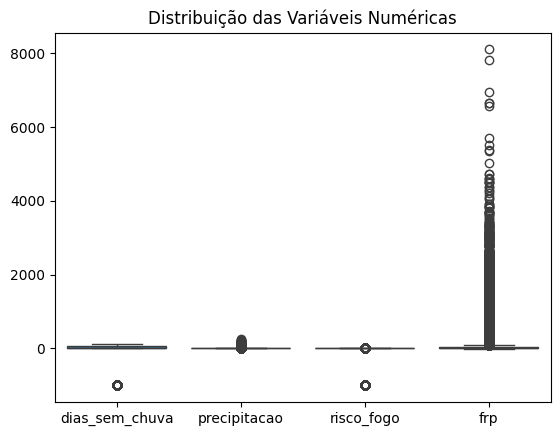

In [6]:
sns.boxplot(data=df[['dias_sem_chuva', 'precipitacao', 'risco_fogo', 'frp']])
plt.title("Distribuição das Variáveis Numéricas")
plt.show()


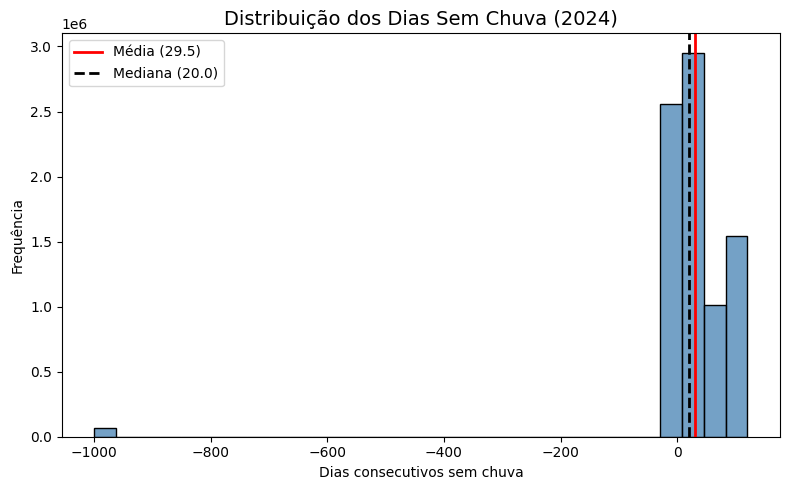

In [7]:
# calcular média e mediana
media = df['dias_sem_chuva'].mean()
mediana = df['dias_sem_chuva'].median()
# histograma
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='dias_sem_chuva', bins=30, kde=False, color='steelblue')
plt.axvline(media, color='red', linestyle='-', linewidth=2, label=f'Média ({media:.1f})')
plt.axvline(mediana, color='black', linestyle='--', linewidth=2, label=f'Mediana ({mediana:.1f})')
plt.title('Distribuição dos Dias Sem Chuva (2024)', fontsize=14)
plt.xlabel('Dias consecutivos sem chuva')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()


Observa-se que:
- A variável **`risco_fogo`** apresenta média em torno de 0.84, indicando alto potencial de queimadas.  
- **`dias_sem_chuva`** tem distribuição assimétrica com valores concentrados abaixo de 40 dias.  
- **`precipitacao`** mostra mediana próxima de zero, reforçando a seca durante o período de pico.  
- O **`frp`** (Fire Radiative Power) apresenta grande variabilidade, indicando diferentes intensidades de fogo.


### 3.4. Tratamento de Valores Inválidos e Duplicados

Nesta etapa, substituímos valores incorretos, ajustamos variáveis e removemos registros duplicados.  
Essas operações garantem consistência e confiabilidade ao conjunto de dados.


In [8]:
# Substituir valores inválidos em 'dias_sem_chuva'
df['dias_sem_chuva'] = df['dias_sem_chuva'].replace(-999, np.nan)
# Corrigir valores negativos de precipitação
df['precipitacao'] = df['precipitacao'].clip(lower=0)
# Garantir que risco_fogo esteja dentro do intervalo [0, 1]
df['risco_fogo'] = df['risco_fogo'].clip(0, 1)

# Verificação das Duplicatas
# Contar duplicatas antes da remoção
duplicatas_antes = df.duplicated().sum()
# Remover duplicatas
df = df.drop_duplicates()
# Contar novamente após a limpeza
duplicatas_depois = df.duplicated().sum()
# Conferir número e nomes das colunas
num_colunas = len(df.columns)

print(f"Duplicatas removidas: {duplicatas_antes}")
print(f"Duplicatas restantes: {duplicatas_depois}")
print(f"Formato final do dataset: {df.shape}")
print(f"Número total de colunas: {num_colunas}")
print("\nColunas atuais:")
print(df.columns.tolist())


Duplicatas removidas: 0
Duplicatas restantes: 0
Formato final do dataset: (8144823, 16)
Número total de colunas: 16

Colunas atuais:
['latitude', 'longitude', 'data_pas', 'satelite', 'pais', 'estado', 'municipio', 'bioma', 'dias_sem_chuva', 'precipitacao', 'risco_fogo', 'area_industrial', 'frp', 'ano', 'mes', 'dia_semana']


In [12]:
# Salvar dataset limpo para o dashboard
df.to_csv("focos_br_todos-sats_2024_limpo.csv", index=False)
print("Arquivo limpo salvo com sucesso!")


Arquivo limpo salvo com sucesso!


# Seção 4: Análise Exploratória e Visualização de Dados (EDA)

### 4.1. Análise Temporal

O objetivo é observar a variação dos focos de queimadas ao longo do ano de 2024.  
O gráfico de linhas abaixo mostra a sazonalidade do fenômeno mês a mês.


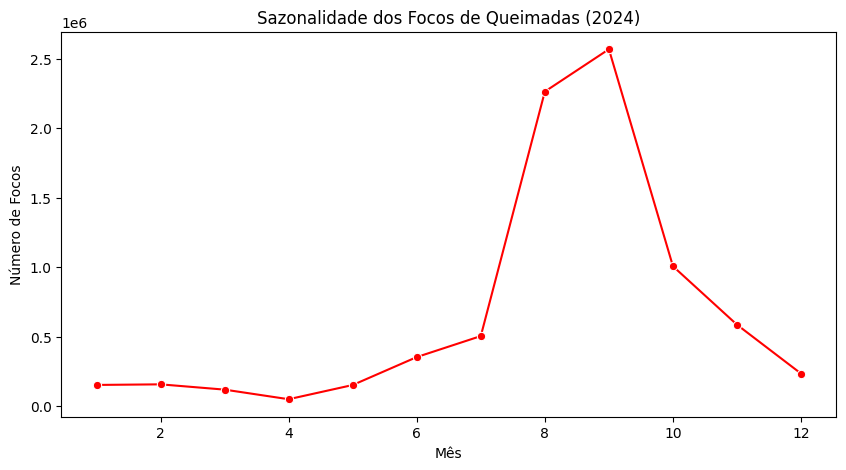

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Focos por mês
focos_por_mes = df.groupby('mes').size()


plt.figure(figsize=(10,5))
sns.lineplot(x=focos_por_mes.index, y=focos_por_mes.values, marker='o', color='red')
plt.title("Sazonalidade dos Focos de Queimadas (2024)")
plt.xlabel("Mês")
plt.ylabel("Número de Focos")
plt.show()


O gráfico mostra que os focos de queimadas aumentam a partir de junho,
com picos em agosto e setembro, coincidindo com a estação seca em grande parte do país.

### 4.2. Análise Categórica

Nesta etapa, identificamos os estados e biomas mais afetados pelas queimadas em 2024.  
Serão utilizados gráficos de barras e uma tabela resumo dos 10 estados com mais ocorrências.


C:\Users\felip\AppData\Local\Temp\ipykernel_25604\2498655405.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_estados.values, y=top_estados.index, palette="Reds_r")


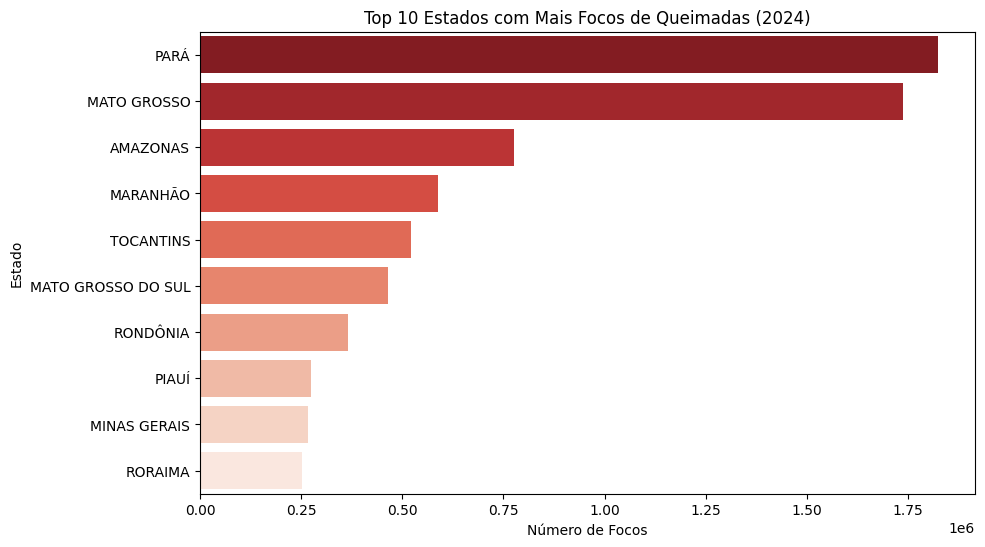

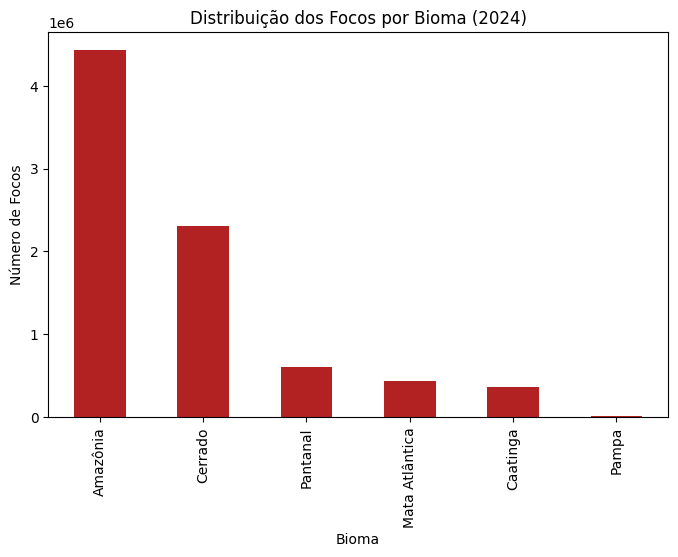

,Total de Focos
estado,
PARÁ,1824366
MATO GROSSO,1737633
AMAZONAS,776216
MARANHÃO,587909
TOCANTINS,522645
MATO GROSSO DO SUL,464014
RONDÔNIA,366792
PIAUÍ,274523
MINAS GERAIS,266086


In [10]:
# Top 10 estados
top_estados = df['estado'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_estados.values, y=top_estados.index, palette="Reds_r")
plt.title("Top 10 Estados com Mais Focos de Queimadas (2024)")
plt.xlabel("Número de Focos")
plt.ylabel("Estado")
plt.show()

# Biomas
plt.figure(figsize=(8,5))
df['bioma'].value_counts().plot(kind='bar', color='firebrick')
plt.title("Distribuição dos Focos por Bioma (2024)")
plt.xlabel("Bioma")
plt.ylabel("Número de Focos")
plt.show()

# Tabela resumo
top_estados.to_frame(name="Total de Focos")


O Pará lidera o número de focos de calor seguido por Mato Grosso, Amazonas e Maranhão. Entre os biomas, a Amazônia e o Cerrado concentram mais de 80% dos registros, reforçando sua vulnerabilidade às queimadas durante o período seco.

### 4.3. Análise Geográfica

Nesta visualização, exploramos a distribuição espacial dos focos de calor em todo o território nacional. Cada ponto representa um foco detectado por satélite. Devido ao grande volume de dados, utilizamos uma amostra de até 50.000 registros.

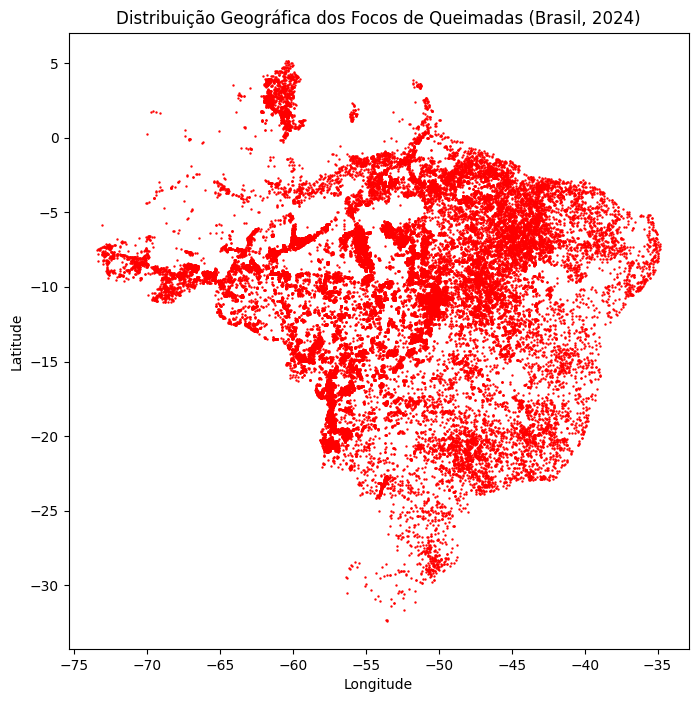

In [11]:
# Amostra aleatória
sample = df.sample(n=min(50000, len(df)), random_state=42)

plt.figure(figsize=(8,8))
plt.scatter(sample['longitude'], sample['latitude'], s=0.5, color='red')
plt.title("Distribuição Geográfica dos Focos de Queimadas (Brasil, 2024)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

A distribuição espacial evidencia maior concentração de focos nas regiões Norte e Centro-Oeste,
sobretudo nos biomas Amazônia e Cerrado, enquanto o litoral apresenta menor incidência.

## Seção 6: Conclusão e Entrega do Projeto

### 6.1. Relatório Final

A análise exploratória dos dados de focos de queimadas do Programa Queimadas do INPE (2024) permitiu compreender o comportamento espacial e temporal das queimadas no território brasileiro.

Os resultados revelaram uma forte sazonalidade, os focos de calor aumentam em determinados períodos do ano. Nesse sentido, os períodos que coincide com a estação seca nas regiões Centro-Oeste e Norte, esse padrão confirma o papel da estiagem prolongada como um dos principais fatores de intensificação das queimadas.

Em termos geográficos se observou que os estados do Pará e Mato Grosso concentram o maior número de registros, seguidos por Amazonas e Maranhão. Entre os biomas, Amazônia e Cerrado se destacam como os mais afetados.

A análise dos municípios também evidenciou altas concentrações em áreas já historicamente impactadas pelo desmatamento, expansão agropecuária, mineração entre outros.

De modo geral, o estudo confirma que o uso de dados abertos e ferramentas interativas é uma abordagem eficaz para compreender fenômenos ambientais complexos e subsidiar ações de fiscalização, gestão territorial e políticas públicas voltadas à conservação.

### 6.2. Critérios de Avaliação

Apesar dos resultados relevantes, o trabalho apresenta algumas limitações:

O estudo está restrito ao ano de 2024 não permitindo comparações históricas.

Os focos de calor detectados por satélites não representam necessariamente áreas queimadas, podendo incluir queimadas controladas ou fontes industriais.

A análise não incorporou fatores climáticos complementares (como temperatura, vento e umidade), que poderiam aprimorar a compreensão das causas e correlações.


### 6.3. Trabalhos Futuros

Para aprimorar o estudo, recomenda-se:

Ampliar o escopo temporal, incluindo séries históricas (ex.: 2015–2024) para identificar tendências de longo prazo.

Integrar dados meteorológicos e de cobertura vegetal, permitindo análises preditivas sobre risco de fogo.

Aplicar técnicas de aprendizado de máquina para prever regiões de maior vulnerabilidade.

Incorporar dados de emissões de carbono e área queimada, contribuindo para estudos de impacto ambiental.